In [7]:
import json

with open('result.json', 'r') as file:
    data = json.load(file)

print(data)


{'wp2': {'partitions_found': 299, 'time_elapsed': 211.43523383140564}, 'wp3': [{'invariant_config': [[0, 'edge_count_invariant'], [1, 'vertex_degree_invariant'], [2, 'weisfeiler_lehman_invariant']], 'partition_development': [{'number_of_partitions': 16, 'time_elapsed_by_this_invariant': 7.254577398300171}, {'number_of_partitions': 57, 'time_elapsed_by_this_invariant': 6.034825325012207}, {'number_of_partitions': 296, 'time_elapsed_by_this_invariant': 80.9452977180481}], 'prefiltering_elapsed_time': 94.23470044136047, 'complete_elapsed_time': 122.99201393127441, 'partitions_found': 299}, {'invariant_config': [[0, 'rank_invariant'], [1, 'vertex_count_invariant'], [2, 'edge_count_invariant'], [3, 'vertex_degree_invariant'], [4, 'weisfeiler_lehman_invariant']], 'partition_development': [{'number_of_partitions': 10, 'time_elapsed_by_this_invariant': 29.71814775466919}, {'number_of_partitions': 30, 'time_elapsed_by_this_invariant': 3.4639296531677246}, {'number_of_partitions': 53, 'time_elap

# check that all procedures find the same number of clusters

In [8]:
wp2_found_partitions = data["wp2"]["partitions_found"]

wp3_found_partitions = [run["partitions_found"] for run in data["wp3"]]
wp4_found_partitions = [run["partitions_found"] for run in data["wp4"]]

for found in wp3_found_partitions:
    assert found == wp2_found_partitions

for found in wp4_found_partitions:
    assert found == wp2_found_partitions

# visualization by total run time

In [17]:
total_run_time_comparison_wp2 = ("wp2-base", data["wp2"]["time_elapsed"])
total_run_time_comparison_wp3 = [(f"wp3-{index}", run["complete_elapsed_time"]) for index, run in enumerate(data["wp3"])]
total_run_time_comparison_wp4 = [(f"wp4-{index}", run["complete_elapsed_time"]) for index, run in enumerate(data["wp4"])]

plot_data = [total_run_time_comparison_wp2] + total_run_time_comparison_wp3 + total_run_time_comparison_wp4 

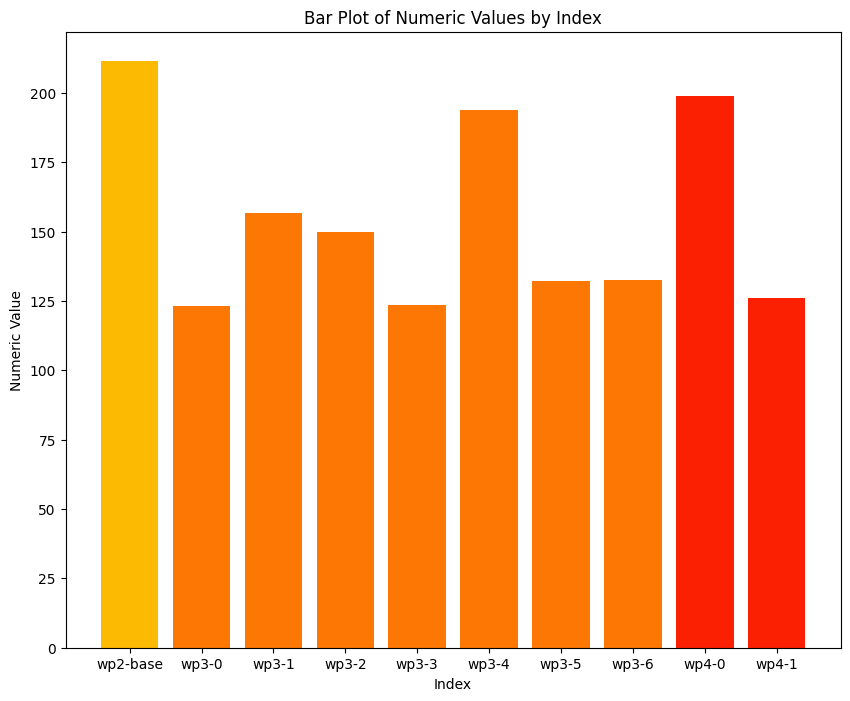

In [22]:
import matplotlib.pyplot as plt

# Separate the plot_data into two lists: indices and values
indices, values = zip(*plot_data)

colors = ['#fcba03' if 'wp2' in idx else '#fc7703' if 'wp3' in idx else '#fc2003' for idx in indices]
plt.figure(figsize=(10, 8))
# Create the bar plot
plt.bar(indices, values, color=colors)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Numeric Value')
plt.title('Bar Plot of Numeric Values by Index')

# Show the plot
plt.show()


# visualization by invariant config